## Kaggle Competition for House Prices: Advanced Regression Techniques 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


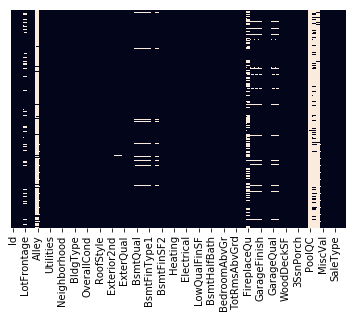

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [9]:
df.shape

(1460, 81)

In [10]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [11]:
df.drop(['Alley','Id'],axis=1,inplace=True)
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df_test.drop(['Alley','Id'],axis=1,inplace=True)
df_test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [12]:
df.shape

(1460, 76)

In [13]:
df_test.shape

(1459, 75)

In [14]:
df['Utilities']=df['Utilities'].fillna(df['Utilities'].mode()[0])
df['Exterior1st']=df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd']=df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinSF1']=df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean())
df['BsmtFinSF2']=df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean())
df['TotalBsmtSF']=df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean())
df['BsmtFullBath']=df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode()[0])
df['BsmtHalfBath']=df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0])
df['KitchenQual']=df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['Functional']=df['Functional'].fillna(df['Functional'].mode()[0])
df['SaleType']=df['SaleType'].fillna(df['SaleType'].mode()[0])

In [15]:
## Fill Missing Values
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MSZoning']=df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())
df_test['MSZoning']=df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])
df_test['BsmtCond']=df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtQual']=df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['FireplaceQu']=df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['GarageFinish']=df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['MasVnrType']=df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0])
df_test['GarageQual']=df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond']=df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df_test['GarageYrBlt']=df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mode()[0])
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])

In [16]:
df_test['Utilities']=df_test['Utilities'].fillna(df_test['Utilities'].mode()[0])
df_test['Exterior1st']=df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd']=df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['BsmtFinSF1']=df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())
df_test['BsmtFinSF2']=df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mean())
df_test['TotalBsmtSF']=df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())
df_test['BsmtFullBath']=df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mode()[0])
df_test['BsmtHalfBath']=df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mode()[0])
df_test['KitchenQual']=df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])
df_test['Functional']=df_test['Functional'].fillna(df_test['Functional'].mode()[0])
df_test['SaleType']=df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])

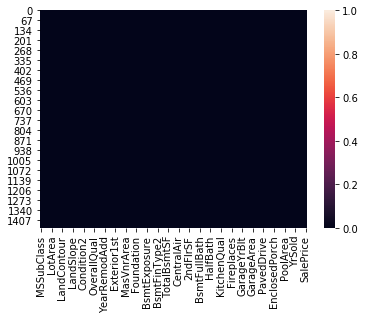

In [17]:
sns.heatmap(df.isnull())

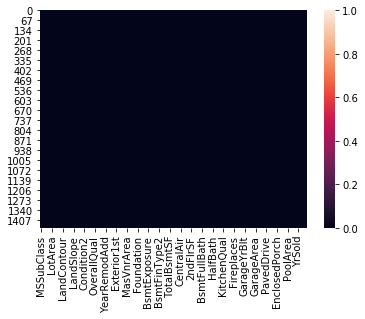

In [18]:
sns.heatmap(df_test.isnull())

In [19]:
df[['BsmtFinType2','BsmtExposure','Foundation','TotalBsmtSF','HalfBath',
         'BsmtFullBath','GarageCars','GarageArea']].isnull().sum()

BsmtFinType2    0
BsmtExposure    0
Foundation      0
TotalBsmtSF     0
HalfBath        0
BsmtFullBath    0
GarageCars      0
GarageArea      0
dtype: int64

In [20]:
df_test[['BsmtFinType2','BsmtExposure','Foundation','TotalBsmtSF','HalfBath',
         'BsmtFullBath','GarageCars','GarageArea']].isnull().sum()

BsmtFinType2    0
BsmtExposure    0
Foundation      0
TotalBsmtSF     0
HalfBath        0
BsmtFullBath    0
GarageCars      1
GarageArea      1
dtype: int64

In [21]:
df_test[['TotalBsmtSF','BsmtFullBath']]

,TotalBsmtSF,BsmtFullBath
0,882.0,0.0
1,1329.0,0.0
2,928.0,0.0
3,926.0,0.0
4,1280.0,0.0
5,763.0,0.0
6,1168.0,1.0
7,789.0,0.0
8,1300.0,1.0
9,882.0,1.0


In [22]:
df_test['TotalBsmtSF']=df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())
df_test['BsmtFullBath']=df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mode()[0])
df_test['GarageCars']=df_test['GarageCars'].fillna(df_test['GarageCars'].mean())
df_test['GarageArea']=df_test['GarageArea'].fillna(df_test['GarageArea'].mean())

In [23]:
df_test[['BsmtFinType2','BsmtExposure','Foundation','TotalBsmtSF','HalfBath',
         'BsmtFullBath']].isnull().sum()

BsmtFinType2    0
BsmtExposure    0
Foundation      0
TotalBsmtSF     0
HalfBath        0
BsmtFullBath    0
dtype: int64

In [24]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [25]:
for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object' :
        unique_cat = len(df_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(df_test['MSZoning'].value_counts().sort_values(ascending=False).head())

Feature 'MSZoning' has 5 categories
Feature 'Street' has 2 categories
Feature 'LotShape' has 4 categories
Feature 'LandContour' has 4 categories
Feature 'Utilities' has 1 categories
Feature 'LotConfig' has 5 categories
Feature 'LandSlope' has 3 categories
Feature 'Neighborhood' has 25 categories
Feature 'Condition1' has 9 categories
Feature 'Condition2' has 5 categories
Feature 'BldgType' has 5 categories
Feature 'HouseStyle' has 7 categories
Feature 'RoofStyle' has 6 categories
Feature 'RoofMatl' has 4 categories
Feature 'Exterior1st' has 13 categories
Feature 'Exterior2nd' has 15 categories
Feature 'MasVnrType' has 4 categories
Feature 'ExterQual' has 4 categories
Feature 'ExterCond' has 5 categories
Feature 'Foundation' has 6 categories
Feature 'BsmtQual' has 4 categories
Feature 'BsmtCond' has 4 categories
Feature 'BsmtExposure' has 4 categories
Feature 'BsmtFinType1' has 6 categories
Feature 'BsmtFinType2' has 6 categories
Feature 'Heating' has 4 categories
Feature 'HeatingQC' has

In [26]:
df.dropna(inplace=True)
df_test.dropna(inplace=True)

In [27]:
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(df['MSZoning'].value_counts().sort_values(ascending=False).head())

Feature 'MSZoning' has 5 categories
Feature 'Street' has 2 categories
Feature 'LotShape' has 4 categories
Feature 'LandContour' has 4 categories
Feature 'Utilities' has 2 categories
Feature 'LotConfig' has 5 categories
Feature 'LandSlope' has 3 categories
Feature 'Neighborhood' has 25 categories
Feature 'Condition1' has 9 categories
Feature 'Condition2' has 8 categories
Feature 'BldgType' has 5 categories
Feature 'HouseStyle' has 8 categories
Feature 'RoofStyle' has 6 categories
Feature 'RoofMatl' has 8 categories
Feature 'Exterior1st' has 15 categories
Feature 'Exterior2nd' has 16 categories
Feature 'MasVnrType' has 4 categories
Feature 'ExterQual' has 4 categories
Feature 'ExterCond' has 5 categories
Feature 'Foundation' has 6 categories
Feature 'BsmtQual' has 4 categories
Feature 'BsmtCond' has 4 categories
Feature 'BsmtExposure' has 4 categories
Feature 'BsmtFinType1' has 6 categories
Feature 'BsmtFinType2' has 6 categories
Feature 'Heating' has 6 categories
Feature 'HeatingQC' has

In [28]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# insert code to get a list of categorical columns into a variable, categorical_columns
catg_columns=[ 'MSZoning',    'Street'  , 'LotShape',    'LandContour',    'Utilities'  ,  'LotConfig'  ,  'LandSlope' ,  
 'Neighborhood',    'Condition1',    'Condition2'  ,  'BldgType' ,  'HouseStyle'   , 'RoofStyle'  ,  'RoofMatl'    ,'Exterior1st'  , 
 'Exterior2nd'   , 'MasVnrType'  ,  'ExterQual'  ,  'ExterCond'  ,  'Foundation'   , 'BsmtQual'    ,'BsmtCond'   , 'BsmtExposure' ,  
 'BsmtFinType1'   ,'BsmtFinType2'  ,  'Heating'  ,  'HeatingQC'    ,'CentralAir'   , 'Electrical'  ,  'KitchenQual',   'Functional' ,  
 'FireplaceQu'    ,'GarageType' , 'GarageFinish',  'GarageQual' , 'GarageCond'  ,  'PavedDrive'   , 'SaleType'  ,  'SaleCondition'   ] 
 # Get the categorical values into a 2D numpy array
df_catg_values = df[catg_columns]
df_catg_values.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [29]:
df_test_catg_values = df_test[catg_columns]
df_test_catg_values.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


In [30]:
df_catg_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 39 columns):
MSZoning         1459 non-null object
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
MasVnrType       1459 non-null object
ExterQual        1459 non-null object
ExterCond        1459 non-null object
Foundation       1459 non-null object
BsmtQual         1459 non-null object
BsmtCond         1459 non-null object
BsmtExposure     1459 non-null object
BsmtFinType1     14

In [31]:
df_catg_val_enc=df_catg_values.apply(LabelEncoder().fit_transform)
df_catg_val_enc.head()
#df=pd.get_dummies(df_catg_values)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,2,6,2,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,3,6,4,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,2,6,4,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,2,6,2,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,2,6,4,1,1,4,4,2,8,4


In [32]:
df_test_catg_val_enc=df_test_catg_values.apply(LabelEncoder().fit_transform)
df_test_catg_val_enc.head()
#df=pd.get_dummies(df_catg_values)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2,1,3,3,0,4,0,12,1,2,...,3,6,2,1,2,3,4,2,8,4
1,3,1,0,3,0,0,0,12,2,2,...,2,6,2,1,2,3,4,2,8,4
2,3,1,0,3,0,4,0,8,2,2,...,3,6,4,1,0,3,4,2,8,4
3,3,1,0,3,0,4,0,8,2,2,...,2,6,2,1,0,3,4,2,8,4
4,3,1,0,1,0,4,0,22,2,2,...,2,6,2,1,1,3,4,2,8,4


In [33]:
df.drop(['MSZoning',    'Street'  , 'LotShape',    'LandContour',    'Utilities'  ,  'LotConfig'  ,  'LandSlope' ,  
 'Neighborhood',    'Condition1',    'Condition2'  ,  'BldgType' ,  'HouseStyle'   , 'RoofStyle'  ,  'RoofMatl'    ,'Exterior1st'  , 
 'Exterior2nd'   , 'MasVnrType'  ,  'ExterQual'  ,  'ExterCond'  ,  'Foundation'   , 'BsmtQual'    ,'BsmtCond'   , 'BsmtExposure' ,  
 'BsmtFinType1'   ,'BsmtFinType2'  ,  'Heating'  ,  'HeatingQC'    ,'CentralAir'   , 'Electrical'  ,  'KitchenQual',   'Functional' ,  
 'FireplaceQu'    ,'GarageType' , 'GarageFinish',  'GarageQual' , 'GarageCond'  ,  'PavedDrive'   , 'SaleType'  ,  'SaleCondition'  ],axis=1,inplace=True)

df_test.drop(['MSZoning',    'Street'  , 'LotShape',    'LandContour',    'Utilities'  ,  'LotConfig'  ,  'LandSlope' ,  
 'Neighborhood',    'Condition1',    'Condition2'  ,  'BldgType' ,  'HouseStyle'   , 'RoofStyle'  ,  'RoofMatl'    ,'Exterior1st'  , 
 'Exterior2nd'   , 'MasVnrType'  ,  'ExterQual'  ,  'ExterCond'  ,  'Foundation'   , 'BsmtQual'    ,'BsmtCond'   , 'BsmtExposure' ,  
 'BsmtFinType1'   ,'BsmtFinType2'  ,  'Heating'  ,  'HeatingQC'    ,'CentralAir'   , 'Electrical'  ,  'KitchenQual',   'Functional' ,  
 'FireplaceQu'    ,'GarageType' , 'GarageFinish',  'GarageQual' , 'GarageCond'  ,  'PavedDrive'   , 'SaleType'  ,  'SaleCondition'  ],axis=1,inplace=True)

In [34]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [35]:
df.shape

(1459, 37)

In [36]:
train_data=pd.concat([df,df_catg_val_enc], axis=1)

In [37]:
train_data.shape

(1459, 76)

In [38]:
test_data=pd.concat([df_test,df_test_catg_val_enc], axis=1)

In [39]:
test_data.shape

(1458, 75)

In [40]:
train_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,2,6,2,1,1,4,4,2,8,4
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,3,6,4,1,1,4,4,2,8,4
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,2,6,4,1,1,4,4,2,8,4
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,2,6,2,5,2,4,4,2,8,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,2,6,4,1,1,4,4,2,8,4


In [41]:
test_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,3,6,2,1,2,3,4,2,8,4
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,2,6,2,1,2,3,4,2,8,4
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,3,6,4,1,0,3,4,2,8,4
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,2,6,2,1,0,3,4,2,8,4
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,2,6,2,1,1,3,4,2,8,4


In [42]:
train_data.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
                ..
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional  

In [43]:
train=train_data
test=test_data

In [44]:
X_train=train.drop(['SalePrice'],axis=1)
y_train=train['SalePrice']
X_test=test
#y_test

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)
price_predict = clf.predict(X_test)

In [46]:
price_predict

array([140000, 190000, 140000, ..., 190000, 140000, 140000], dtype=int64)

In [47]:
##Create Sample Submission file
pred=pd.DataFrame(price_predict)
df=pd.read_csv('sample_submission.csv')
dataset=pd.concat([df['Id'],pred],axis=1)
dataset.columns=['Id','SalePrice']
dataset.to_csv('sample_submission1.csv',index=False)